# * Baseball Case Study

# Problem Statement:

# This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

# -- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

# -- Output: Number of predicted wins (W)

# To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("baseball.csv")

In [3]:
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
#Lets check the shape of dataset
data.shape

(30, 17)

# Data is Duplicated ?

In [5]:
data.duplicated().sum()

0

In [6]:
#Lets check the data type of dataset
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
#Checking the information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
#Checking null values in dataset
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [9]:
#Checking value counts of target column
data['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

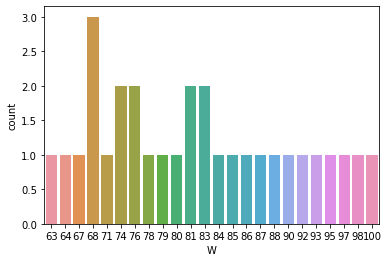

In [10]:
sns.countplot(x='W',data=data)
plt.show()

In [11]:
#Checking description of dataset
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Basic Analysis with Visualisation

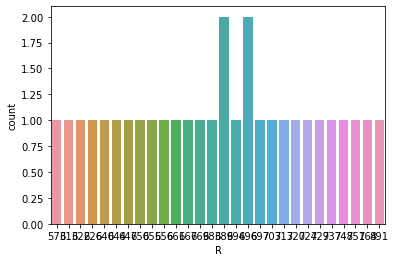

689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64

In [12]:
#Lets plot R data .Using count plot
sns.countplot(x='R',data=data)
plt.show()
data['R'].value_counts()

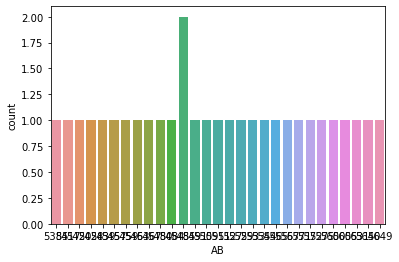

5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64

In [13]:
#Lets plot AB data .Using count plot
sns.countplot(x='AB',data=data)
plt.show()
data['AB'].value_counts()

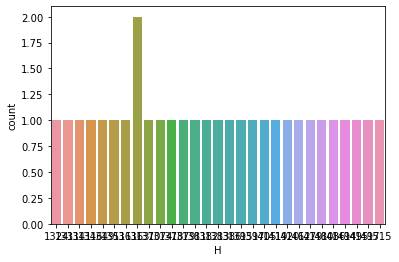

1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1
1379    1
1331    1
1419    1
1495    1
1383    1
1370    1
1397    1
1480    1
1515    1
1381    1
1395    1
1479    1
Name: H, dtype: int64

In [14]:
#Lets plot H data .Using count plot
sns.countplot(x='H',data=data)
plt.show()
data['H'].value_counts()

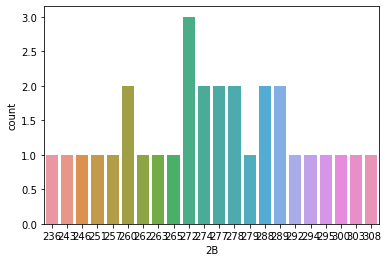

272    3
260    2
289    2
278    2
277    2
274    2
288    2
300    1
292    1
251    1
236    1
265    1
295    1
257    1
243    1
262    1
279    1
294    1
246    1
308    1
303    1
263    1
Name: 2B, dtype: int64

In [15]:
#Lets plot 2B data .Using count plot
sns.countplot(x='2B',data=data)
plt.show()
data['2B'].value_counts()

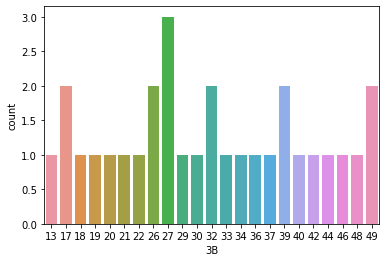

27    3
39    2
49    2
17    2
32    2
26    2
42    1
48    1
37    1
18    1
40    1
13    1
34    1
30    1
21    1
46    1
22    1
44    1
33    1
20    1
19    1
29    1
36    1
Name: 3B, dtype: int64

In [16]:
#Lets plot 3B data .Using count plot
sns.countplot(x='3B',data=data)
plt.show()
data['3B'].value_counts()

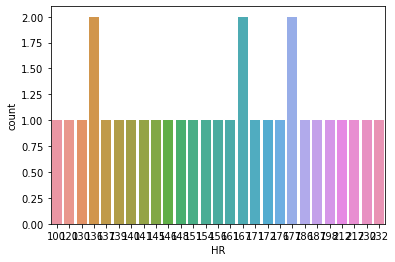

136    2
167    2
177    2
139    1
137    1
148    1
154    1
187    1
130    1
100    1
120    1
145    1
171    1
140    1
198    1
146    1
156    1
176    1
230    1
172    1
161    1
217    1
212    1
232    1
151    1
141    1
186    1
Name: HR, dtype: int64

In [17]:
#Lets plot HR data .Using count plot
sns.countplot(x='HR',data=data)
plt.show()
data['HR'].value_counts()

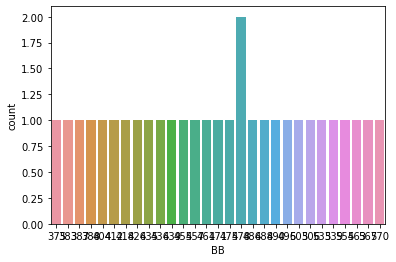

478    2
383    1
461    1
426    1
490    1
457    1
563    1
387    1
471    1
375    1
539    1
488    1
496    1
412    1
567    1
506    1
439    1
475    1
435    1
486    1
503    1
436    1
418    1
554    1
570    1
455    1
404    1
533    1
388    1
Name: BB, dtype: int64

In [18]:
#Lets plot BB data .Using count plot
sns.countplot(x='BB',data=data)
plt.show()
data['BB'].value_counts()

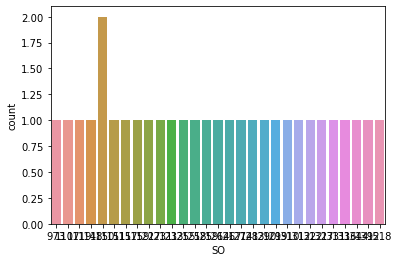

1150    2
973     1
1267    1
1327    1
1312    1
1159    1
1258    1
1274    1
1107    1
1344    1
1290    1
1255    1
1299    1
1518    1
1322    1
1119    1
1264    1
1336    1
1392    1
1233    1
1148    1
1310    1
1331    1
1227    1
1151    1
1259    1
1231    1
1157    1
1283    1
Name: SO, dtype: int64

In [19]:
#Lets plot SO data .Using count plot
sns.countplot(x='SO',data=data)
plt.show()
data['SO'].value_counts()

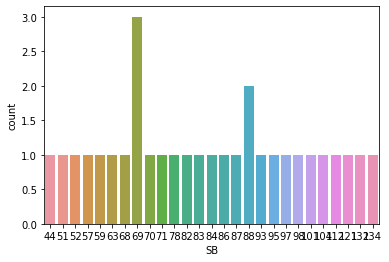

69     3
88     2
78     1
82     1
132    1
93     1
59     1
112    1
57     1
51     1
134    1
84     1
95     1
98     1
104    1
70     1
52     1
121    1
101    1
71     1
87     1
44     1
63     1
83     1
68     1
86     1
97     1
Name: SB, dtype: int64

In [20]:
#Lets plot SB data .Using count plot
sns.countplot(x='SB',data=data)
plt.show()
data['SB'].value_counts()

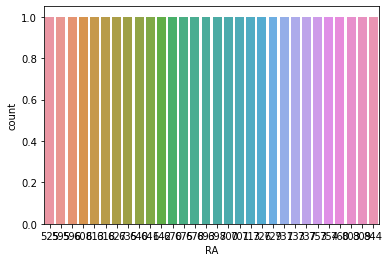

641    1
700    1
731    1
713    1
627    1
595    1
809    1
760    1
678    1
635    1
613    1
754    1
737    1
608    1
596    1
525    1
729    1
726    1
675    1
618    1
733    1
753    1
642    1
693    1
698    1
670    1
803    1
701    1
640    1
844    1
Name: RA, dtype: int64

In [21]:
#Lets plot RA data .Using count plot
sns.countplot(x='RA',data=data)
plt.show()
data['RA'].value_counts()

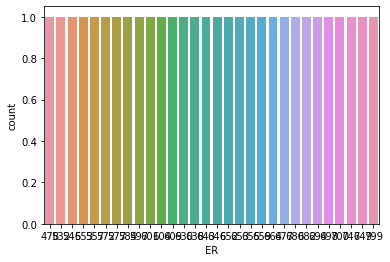

601    1
653    1
655    1
659    1
597    1
553    1
749    1
698    1
638    1
577    1
557    1
700    1
682    1
546    1
532    1
478    1
664    1
677    1
630    1
572    1
680    1
694    1
604    1
646    1
652    1
609    1
746    1
643    1
584    1
799    1
Name: ER, dtype: int64

In [22]:
#Lets plot ER data .Using count plot
sns.countplot(x='ER',data=data)
plt.show()
data['ER'].value_counts()

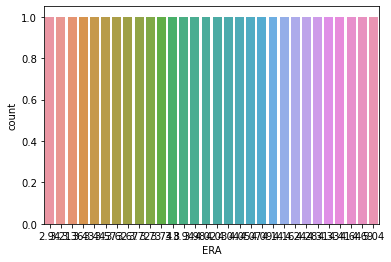

3.73    1
4.07    1
4.09    1
4.04    1
3.72    1
3.44    1
4.69    1
4.41    1
4.02    1
3.62    1
3.43    1
4.33    1
4.28    1
3.36    1
3.21    1
2.94    1
4.14    1
4.16    1
3.94    1
3.57    1
4.24    1
4.31    1
3.74    1
4.05    1
4.03    1
3.80    1
4.64    1
3.98    1
3.67    1
5.04    1
Name: ERA, dtype: int64

In [23]:
#Lets plot ERA data .Using count plot
sns.countplot(x='ERA',data=data)
plt.show()
data['ERA'].value_counts()

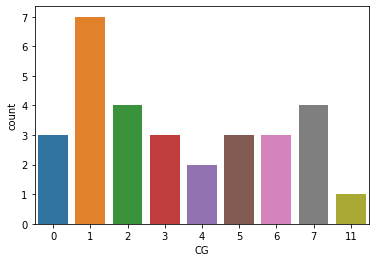

1     7
2     4
7     4
3     3
0     3
5     3
6     3
4     2
11    1
Name: CG, dtype: int64

In [24]:
#Lets plot CG data .Using count plot
sns.countplot(x='CG',data=data)
plt.show()
data['CG'].value_counts()

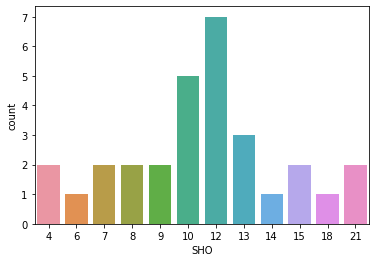

12    7
10    5
13    3
8     2
9     2
4     2
15    2
21    2
7     2
14    1
18    1
6     1
Name: SHO, dtype: int64

In [25]:
#Lets plot SHO data .Using count plot
sns.countplot(x='SHO',data=data)
plt.show()
data['SHO'].value_counts()

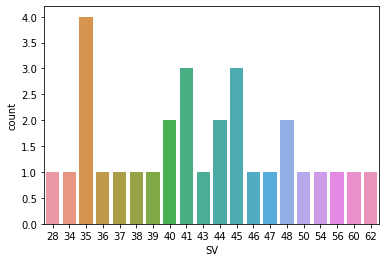

35    4
41    3
45    3
44    2
48    2
40    2
56    1
28    1
47    1
50    1
54    1
62    1
39    1
46    1
60    1
43    1
34    1
37    1
38    1
36    1
Name: SV, dtype: int64

In [26]:
#Lets plot SV data .Using count plot
sns.countplot(x='SV',data=data)
plt.show()
data['SV'].value_counts()

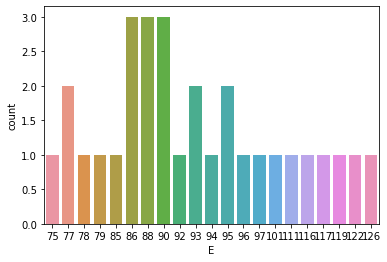

88     3
90     3
86     3
93     2
77     2
95     2
122    1
78     1
75     1
117    1
116    1
111    1
94     1
96     1
126    1
85     1
119    1
97     1
101    1
79     1
92     1
Name: E, dtype: int64

In [27]:
#Lets plot E data .Using count plot
sns.countplot(x='E',data=data)
plt.show()
data['E'].value_counts()

# * EDA (Exploratory data analysis)

In [28]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


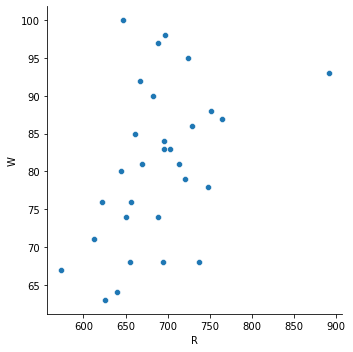

In [29]:
sns.relplot(x='R',y='W',data=data,kind='scatter')
plt.show()

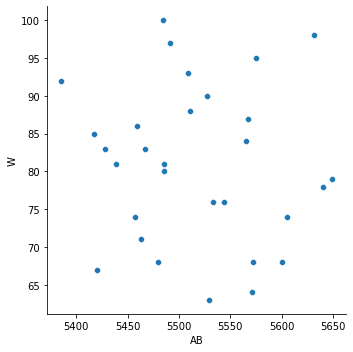

In [30]:
sns.relplot(x='AB',y='W',data=data,kind='scatter')
plt.show()

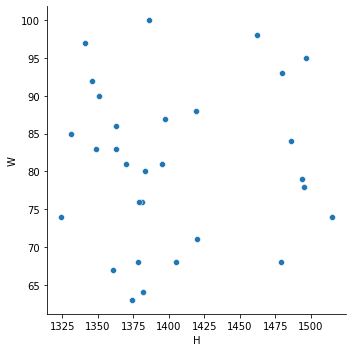

In [31]:
sns.relplot(x='H',y='W',data=data,kind='scatter')
plt.show()

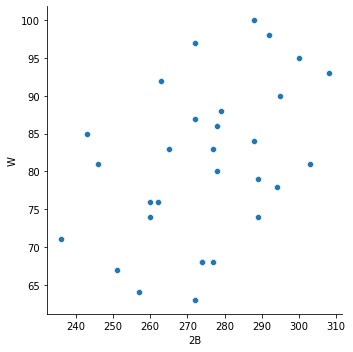

In [32]:
sns.relplot(x='2B',y='W',data=data,kind='scatter')
plt.show()

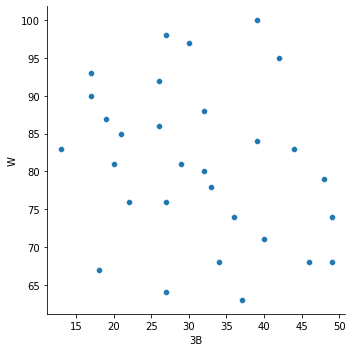

In [33]:
sns.relplot(x='3B',y='W',data=data,kind='scatter')
plt.show()

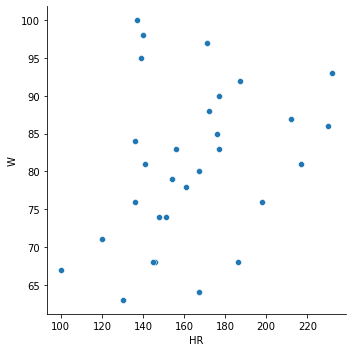

In [34]:
sns.relplot(x='HR',y='W',data=data,kind='scatter')
plt.show()

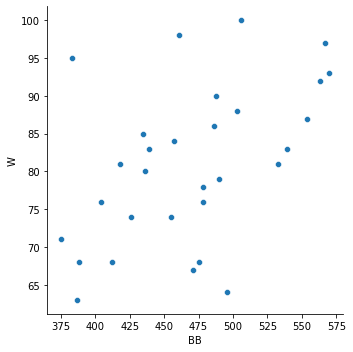

In [35]:
sns.relplot(x='BB',y='W',data=data,kind='scatter')
plt.show()

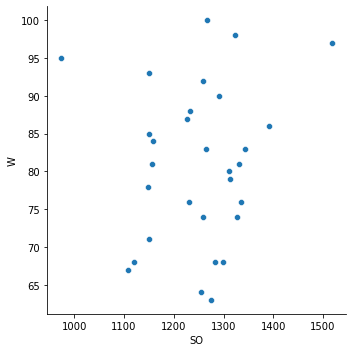

In [36]:
sns.relplot(x='SO',y='W',data=data,kind='scatter')
plt.show()

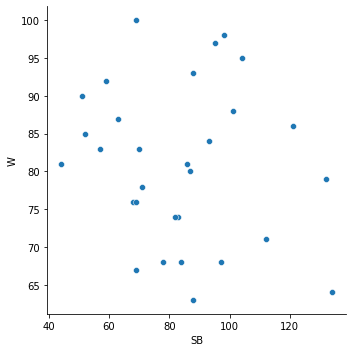

In [37]:
sns.relplot(x='SB',y='W',data=data,kind='scatter')
plt.show()

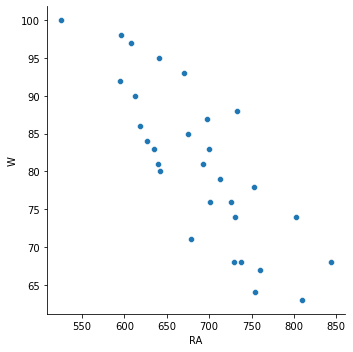

In [38]:
sns.relplot(x='RA',y='W',data=data,kind='scatter')
plt.show()

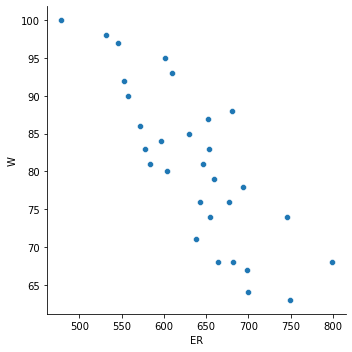

In [39]:
sns.relplot(x='ER',y='W',data=data,kind='scatter')
plt.show()

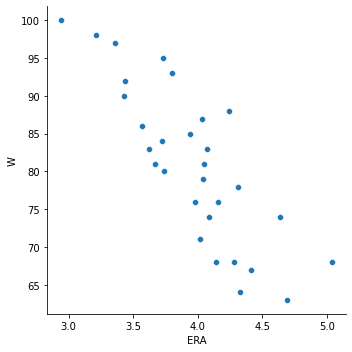

In [40]:
sns.relplot(x='ERA',y='W',data=data,kind='scatter')
plt.show()

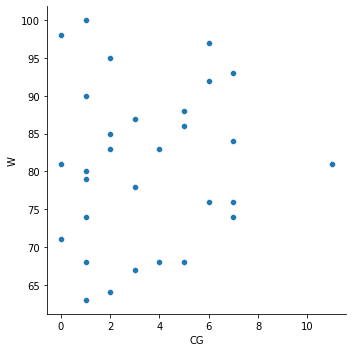

In [41]:
sns.relplot(x='CG',y='W',data=data,kind='scatter')
plt.show()

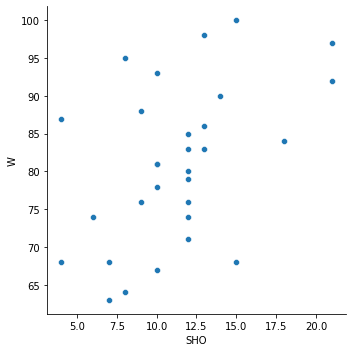

In [42]:
sns.relplot(x='SHO',y='W',data=data,kind='scatter')
plt.show()

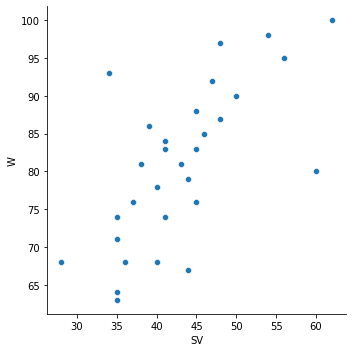

In [43]:
sns.relplot(x='SV',y='W',data=data,kind='scatter')
plt.show()

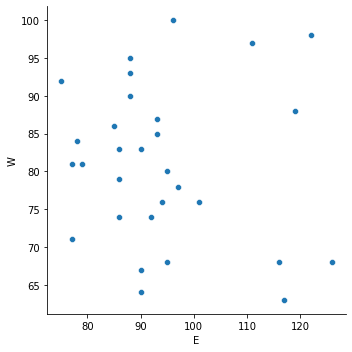

In [44]:
sns.relplot(x='E',y='W',data=data,kind='scatter')
plt.show()

In [45]:
data.shape

(30, 17)

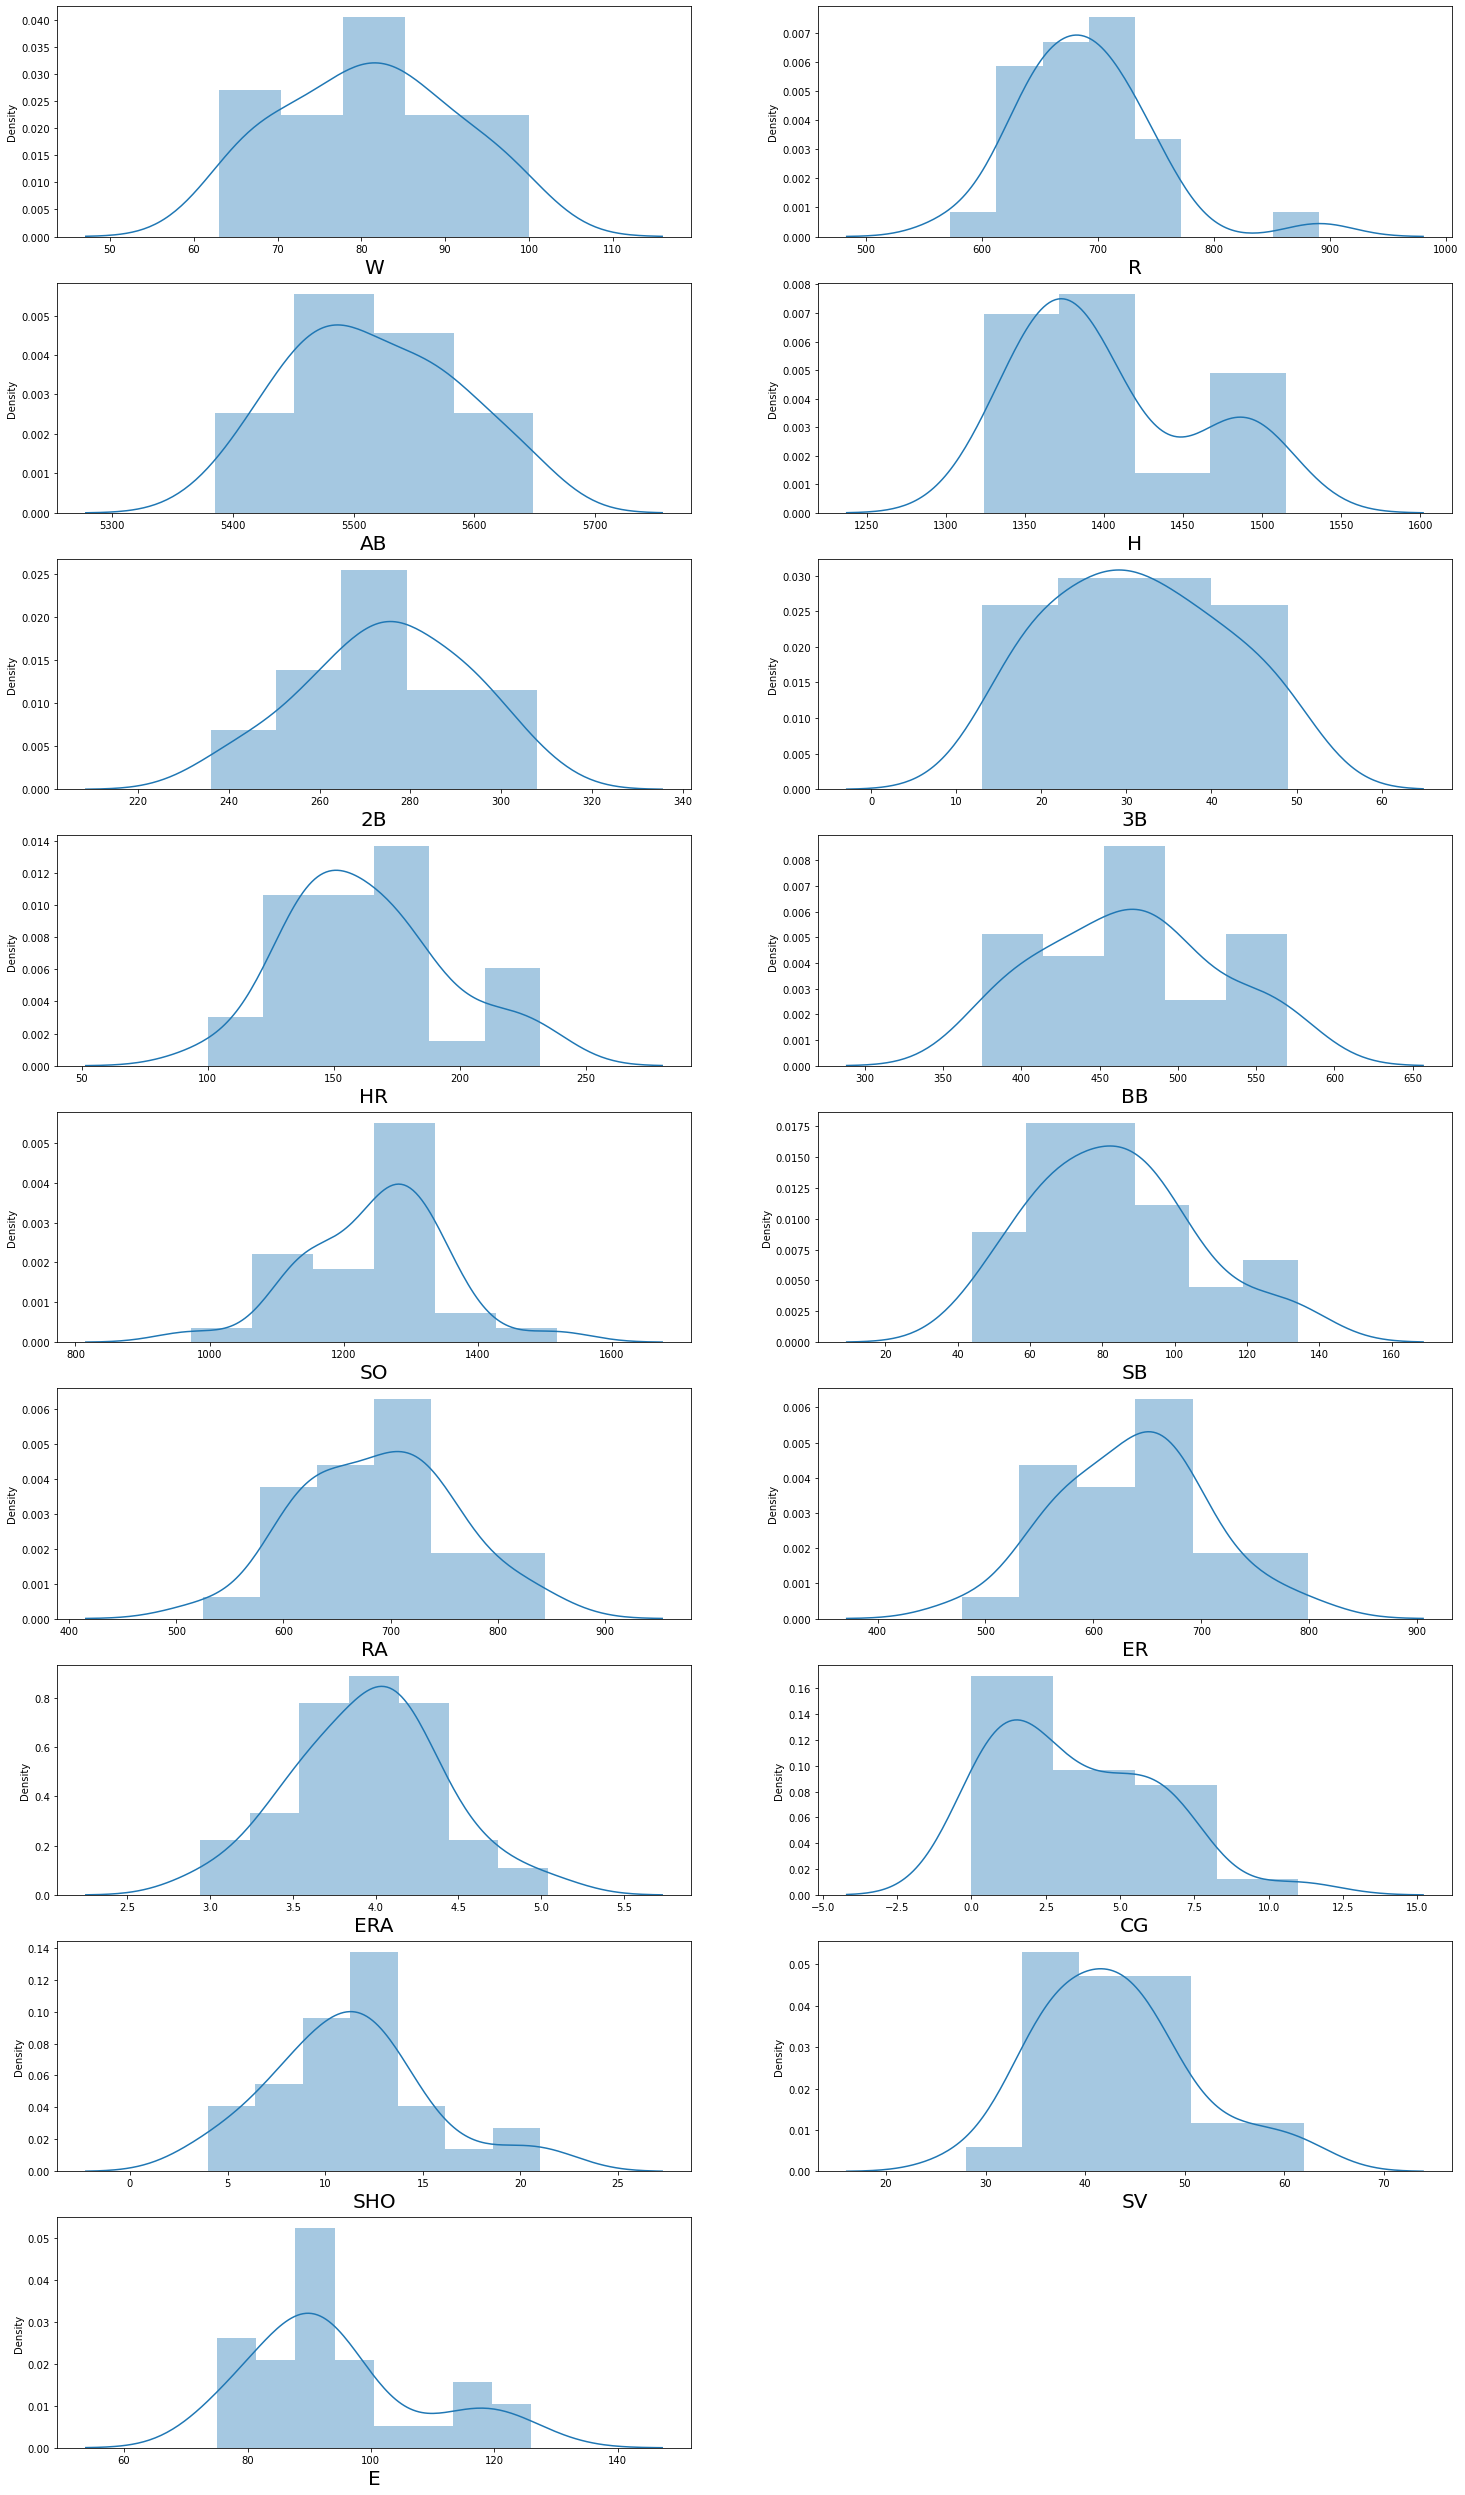

In [46]:
plt.figure(figsize=(25,50))
plotnumber=1

for column in data:
    if plotnumber<=17:
        ax=plt.subplot(10,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# * BOXPLOT

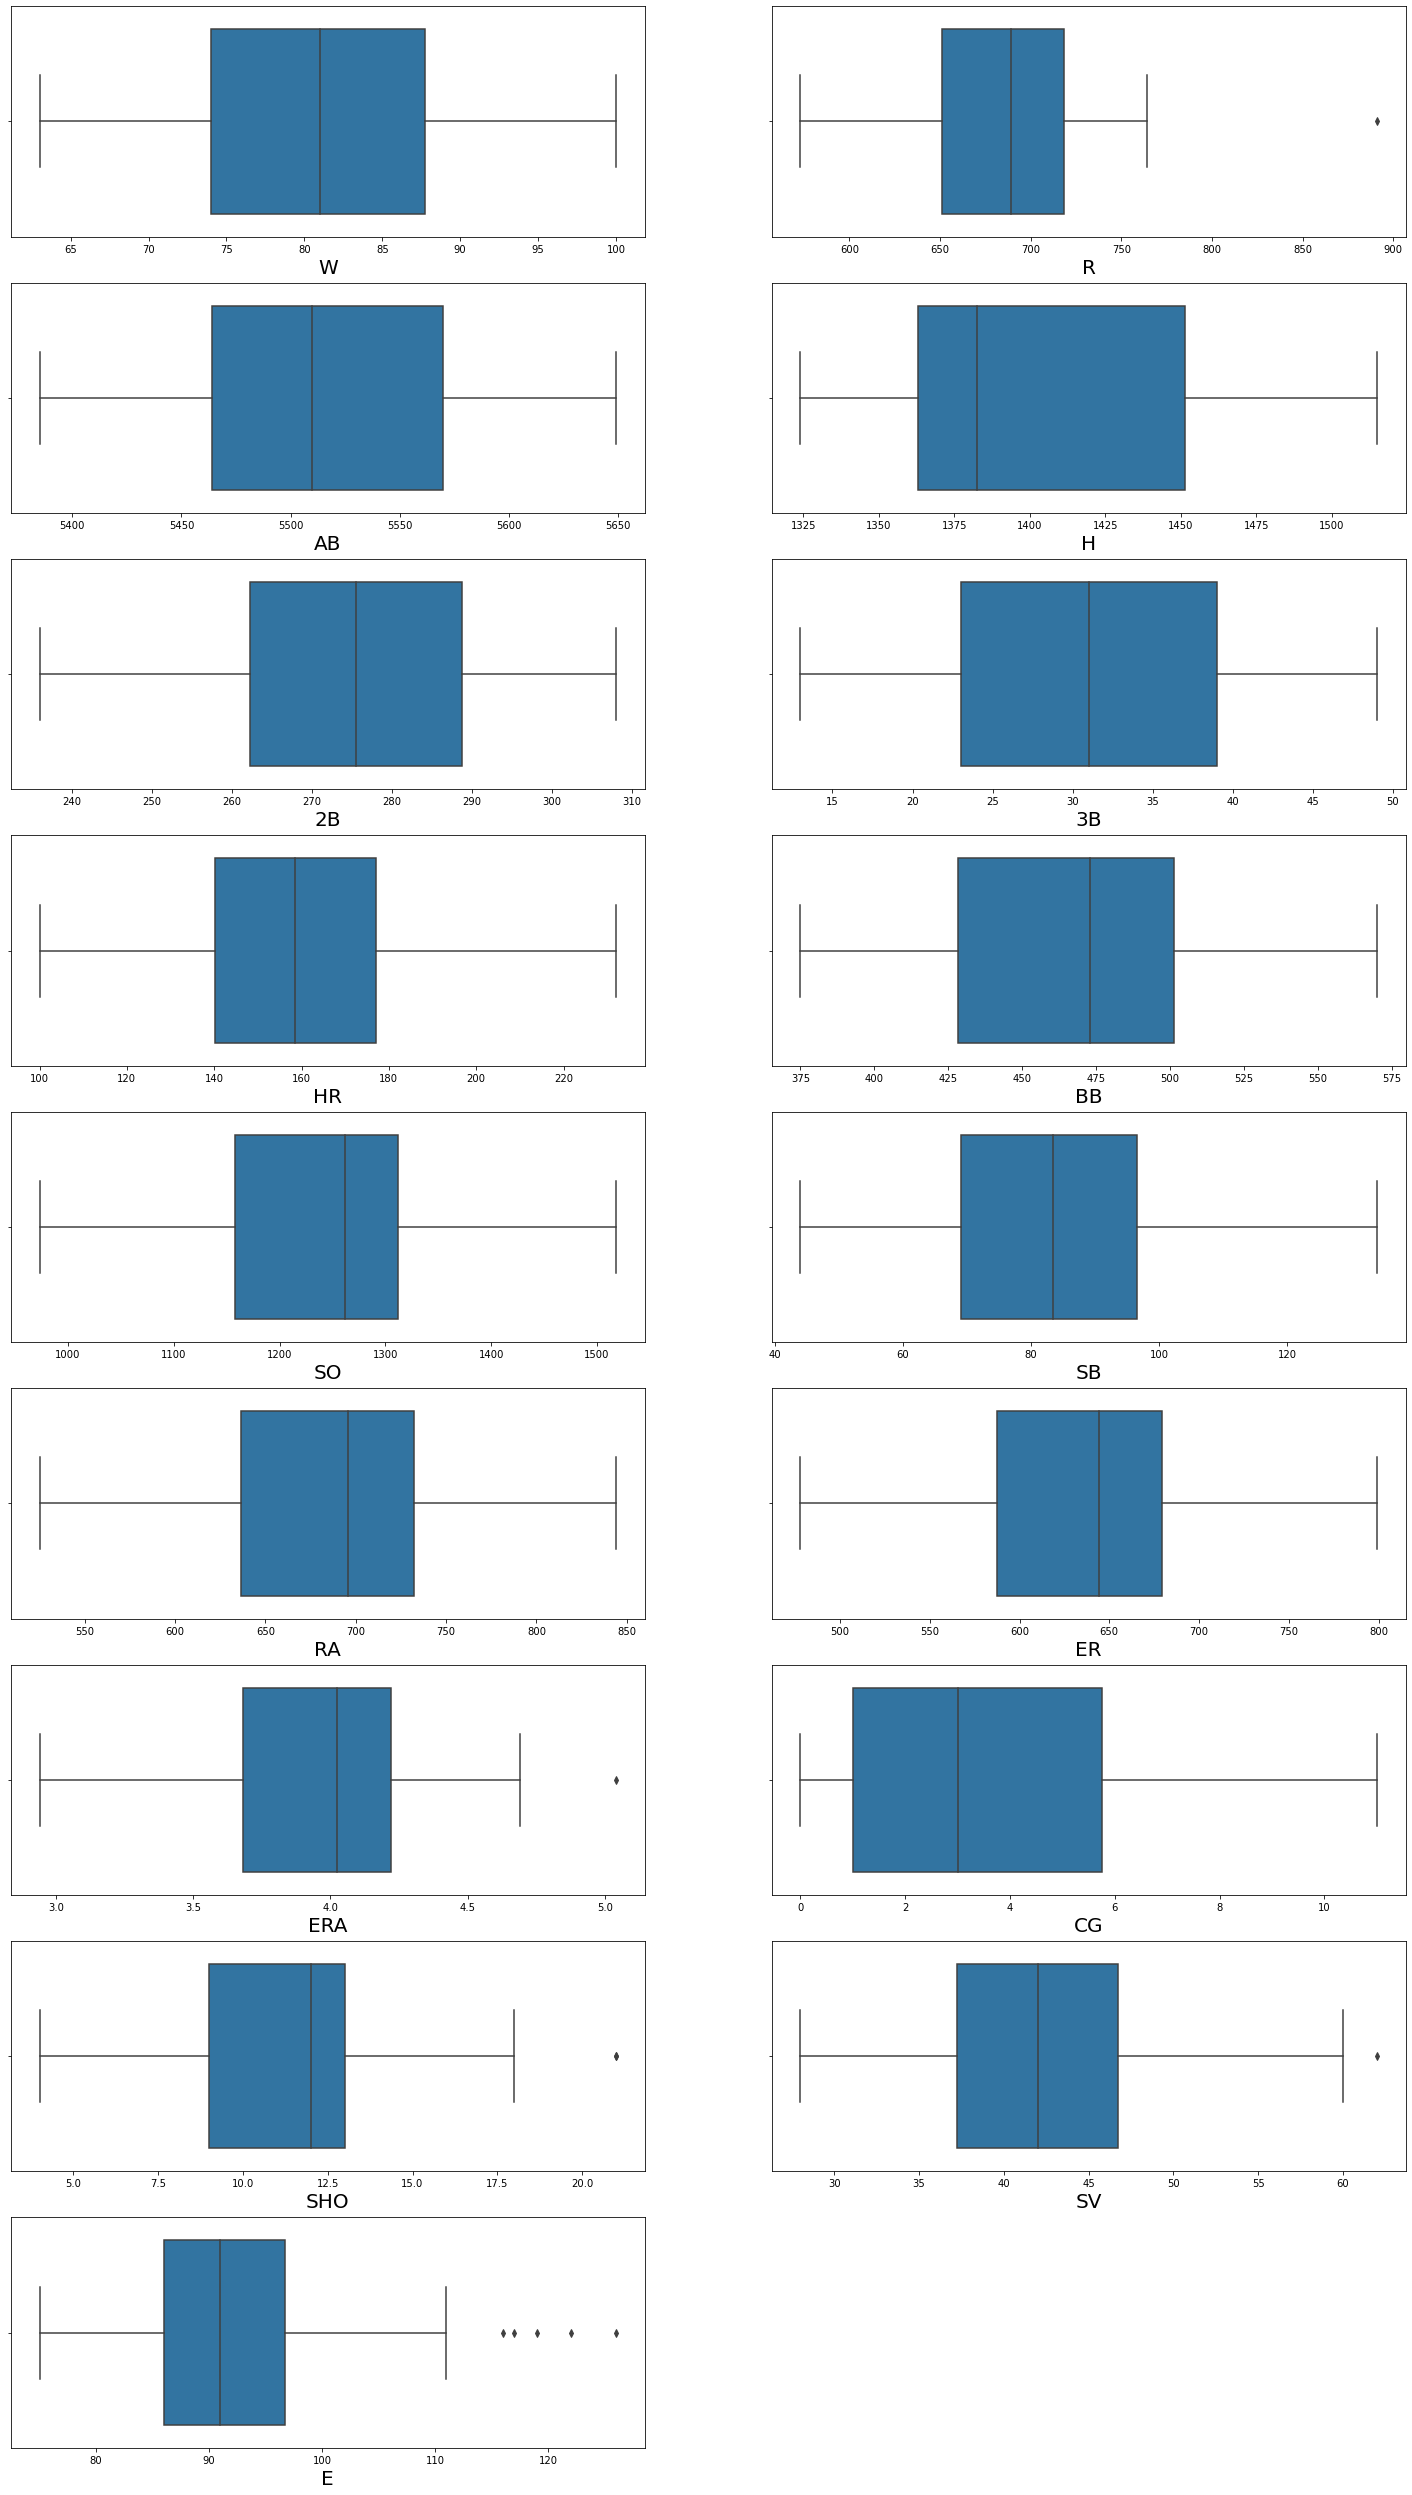

In [47]:
plt.figure(figsize=(25,50))
plotnumber=1
for column in data:
    if plotnumber <=17:
        ax=plt.subplot(10,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

# * Multivariate Analysis:

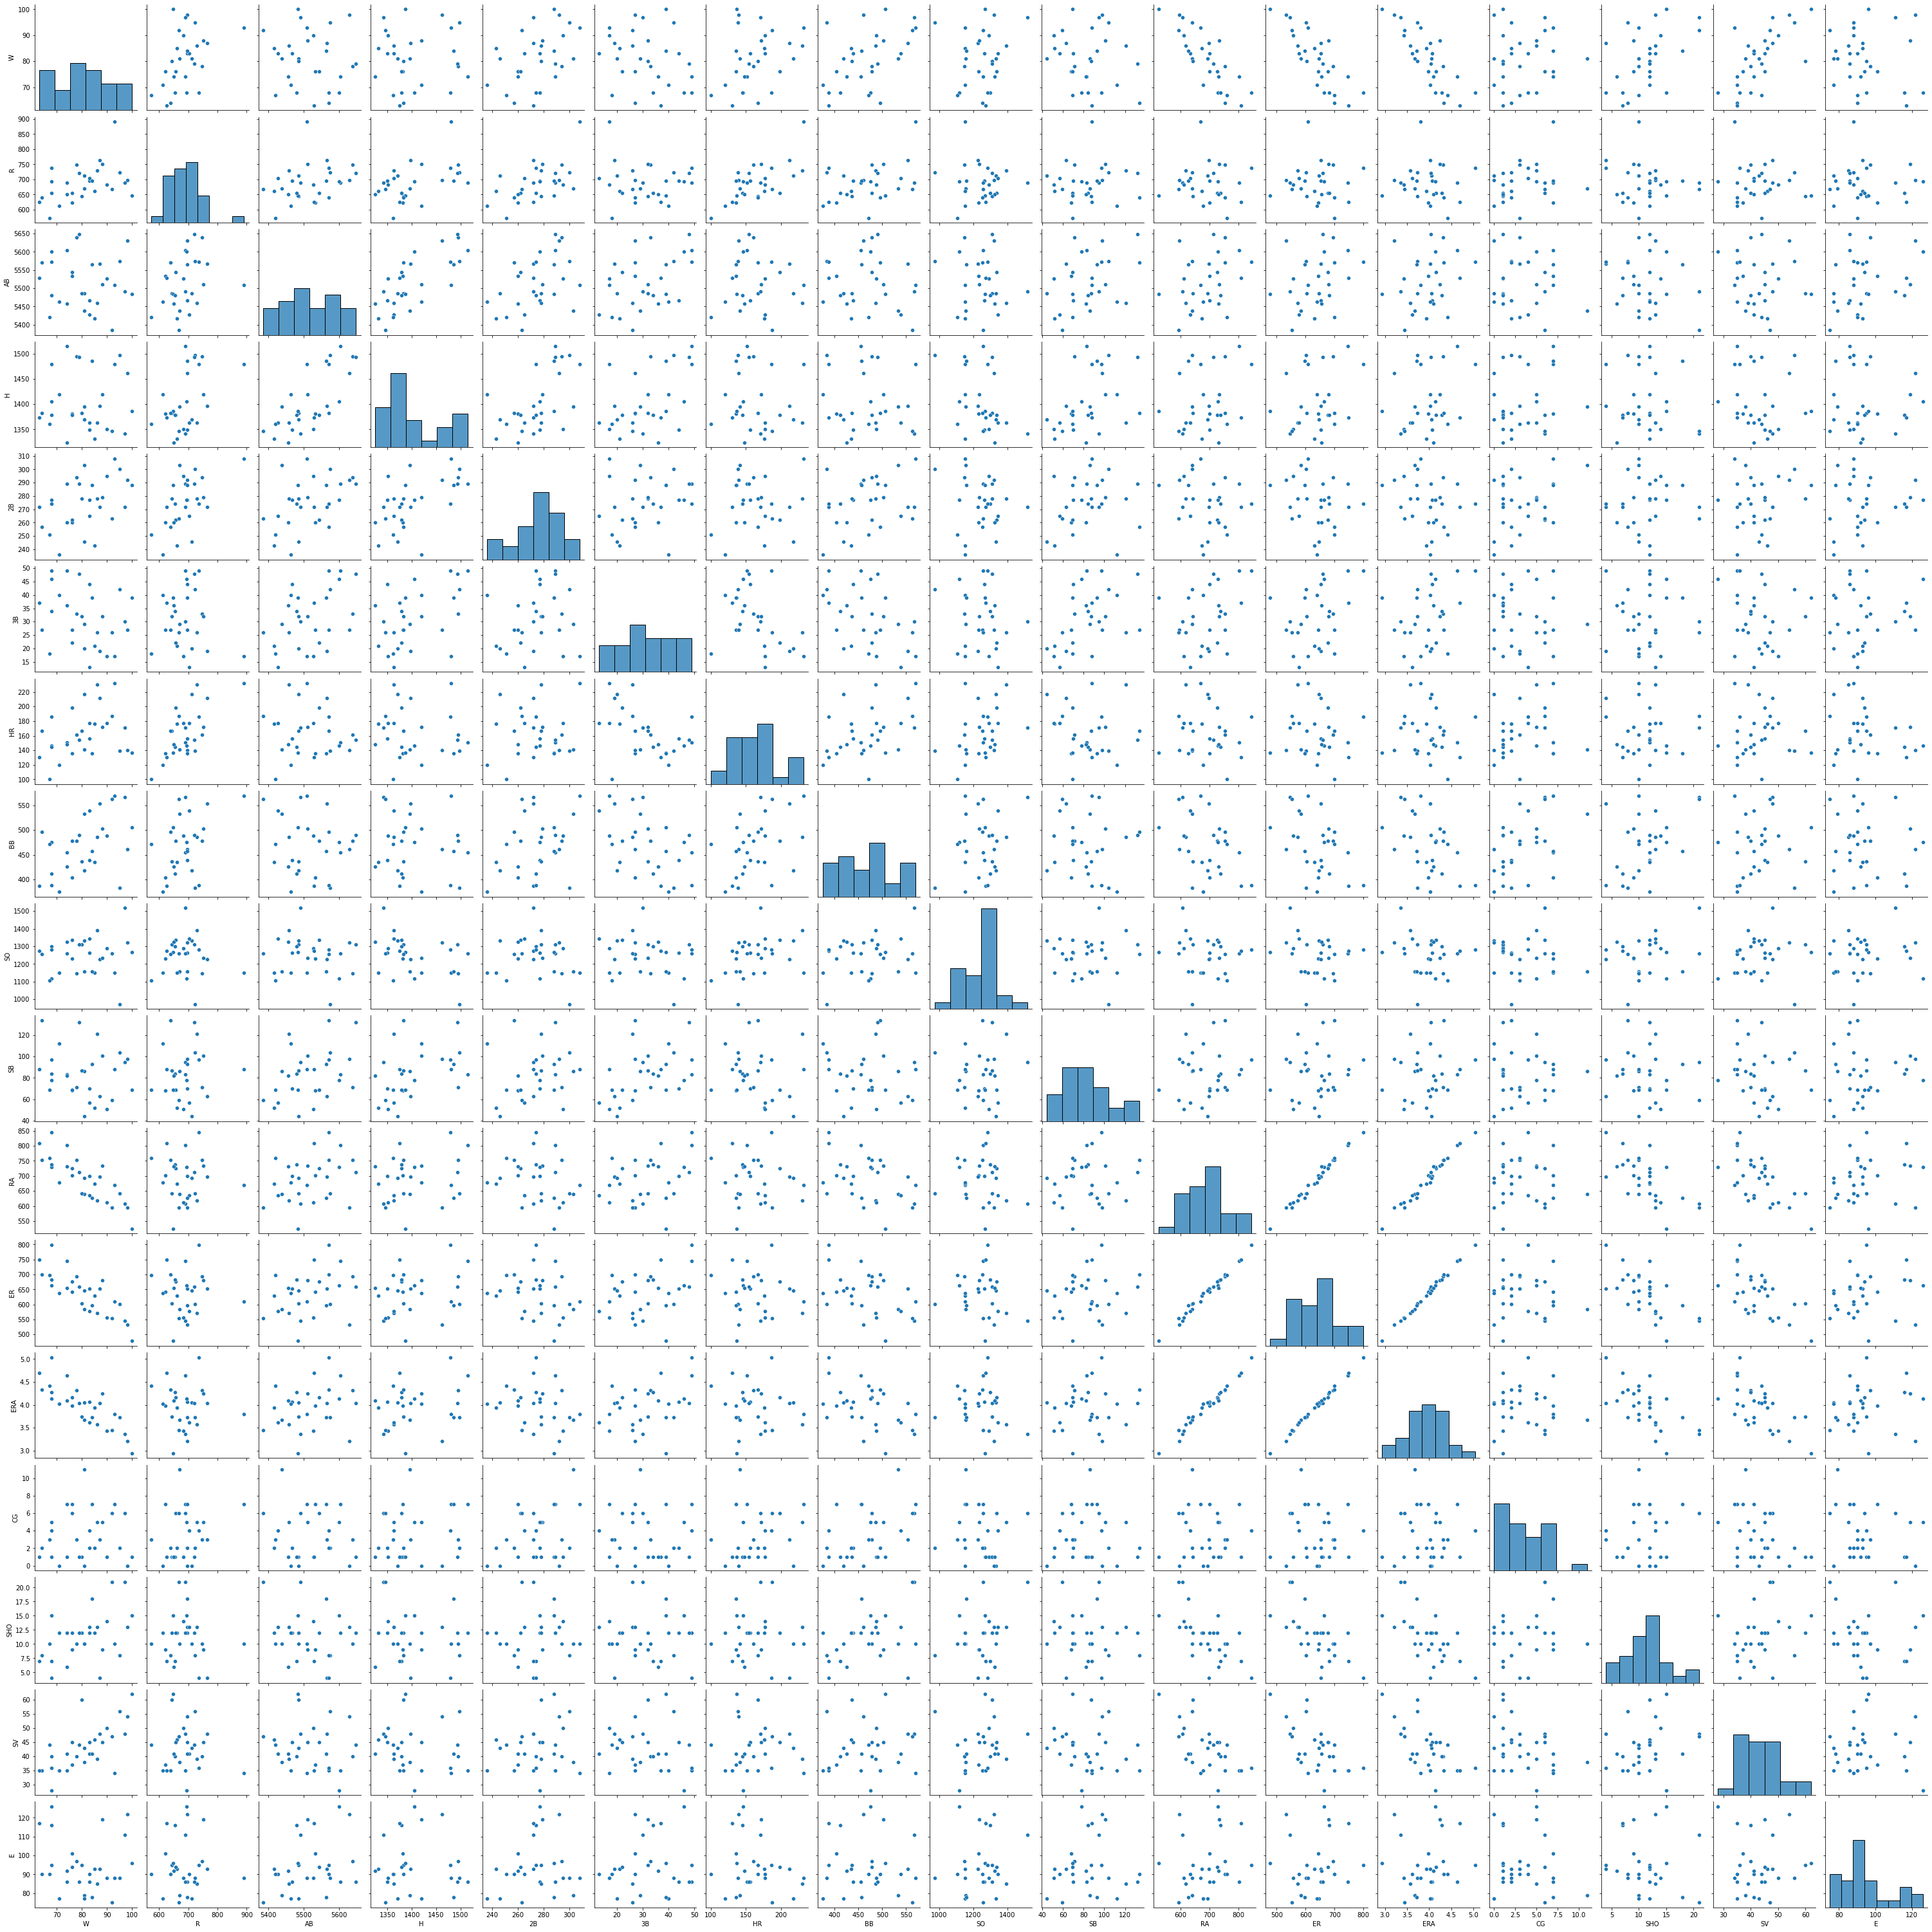

In [48]:
sns.pairplot(data)
plt.show()

# Removing Outliers:

# Zscore method:

In [49]:
from scipy.stats import zscore
z_score=zscore(data[['R','ERA','SHO','SV','E']])
abs_z_score=np.abs(z_score)

In [50]:
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,1400.896552,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,636.758621,3.961724,3.344828,11.344828,43.379310,94.551724
std,10.384006,45.357040,71.701076,56.264265,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,71.195734,0.461148,2.729153,4.185655,7.816712,14.153713
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,650.000000,5463.000000,1363.000000,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,584.000000,3.670000,1.000000,9.000000,38.000000,86.000000
50%,81.000000,689.000000,5511.000000,1382.000000,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,646.000000,4.030000,3.000000,12.000000,43.000000,92.000000
75%,87.000000,713.000000,5571.000000,1420.000000,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,680.000000,4.240000,5.000000,13.000000,47.000000,97.000000
max,100.000000,764.000000,5649.000000,1515.000000,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [51]:
data.shape

(29, 17)

# Checking for Skewness:

In [52]:
#Checking for Skewness
data.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

# Dividing data in feature and vectors

In [53]:
x=data.drop(columns='W')#Feature
y=data.W#Target

In [54]:
#Lets import standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.95939835,  0.83008422,  1.73830631,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.50148589, -0.81326172,  1.64315663,
        -0.47109143],
       [ 0.33114717, -0.70283074, -0.93869788,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.50148589,  0.15929869,  0.21100645,
        -0.61489829],
       [-0.27466646, -1.10025314, -0.10665604,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  2.85461197, -0.32698152, -0.70036184,
        -1.1182223 ],
       [-1.32923093,  0.23395062, -0.35988616, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.36301292, -0.57012162, -0.83055731,
         0.46365315],
       [ 0.17408438,  1.25589393,  2

# Now use VIF for checking multicollinearity problem

In [55]:
#Lets import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature']=x.columns

In [56]:
#Lets check how lookinf VIF score
vif

,vif,feature
0,7.229564,R
1,18.333377,AB
2,10.558458,H
3,3.743423,2B
4,3.278636,3B
5,8.426403,HR
6,3.431971,BB
7,2.720640,SO
8,2.110804,SB
9,197.315706,RA


# Droping Columns

In [57]:
data=data.drop(columns=['ER','ERA'],axis=1)
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,5,9,45,119


In [58]:
data.shape

(29, 15)

# Lets Build a Model

In [59]:
#lets do train test split
#Import train test split
from sklearn.model_selection import train_test_split
#Import Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#Import R2_score
from sklearn.metrics import r2_score,mean_squared_error

In [60]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    x_pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 0.9793017186900749
 At random state 0 , the testing accuracy is :- 0.376424120241284


 At random state 1 , the Training accuracy is :- 0.96935160044487
 At random state 1 , the testing accuracy is :- 0.7555241414909614


 At random state 2 , the Training accuracy is :- 0.966488123221676
 At random state 2 , the testing accuracy is :- -0.3292909249904006


 At random state 3 , the Training accuracy is :- 0.9534657143080717
 At random state 3 , the testing accuracy is :- 0.8485894004113604


 At random state 4 , the Training accuracy is :- 0.9611298547801513
 At random state 4 , the testing accuracy is :- 0.7514775069642646


 At random state 5 , the Training accuracy is :- 0.9617989022273269
 At random state 5 , the testing accuracy is :- 0.5545096693427418


 At random state 6 , the Training accuracy is :- 0.960321770783518
 At random state 6 , the testing accuracy is :- 0.7473255183245264


 At random state 7 , the Training accuracy is

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=30)

In [62]:
lr.fit(x_train,y_train)

LinearRegression()

In [63]:
#Lets Print Training Score
pred_train=lr.predict(x_train)
print(r2_score(y_train,pred_train))

0.9509987369376941


In [64]:
#Lets Print Testing Score
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.8592555824296175


# Cross Validation of the Model

In [65]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is -1.3072639344878239 and accuracy for training is -1.3661399090682242 and accuracy for testing is -1.5803779166994993


At cross fold 3 the CV Score is -1.0613861623995666 and accuracy for training is -1.3661399090682242 and accuracy for testing is -1.5803779166994993


At cross fold 4 the CV Score is -0.24334983064485805 and accuracy for training is -1.3661399090682242 and accuracy for testing is -1.5803779166994993


At cross fold 5 the CV Score is 0.037628660496317835 and accuracy for training is -1.3661399090682242 and accuracy for testing is -1.5803779166994993


At cross fold 6 the CV Score is -0.14490415472920387 and accuracy for training is -1.3661399090682242 and accuracy for testing is -1.5803779166994993


At cross fold 7 the CV Score is -0.16006807093955125 and accuracy for training is -1.3661399090682242 and accuracy for testing is -1.5803779166994993


At cross fold 8 the CV Score is 0.2328584092475074 and accuracy for training is -1.3661399

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

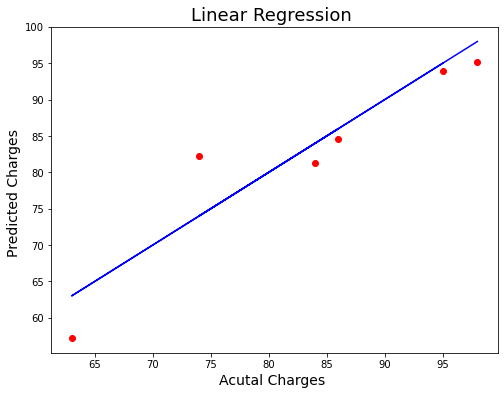

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Linear Regression ",fontsize=18)
plt.savefig('lr.png')
plt.show()

# Regularization -

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [68]:
#lets import Lasso (Least absolute shrinkage and selection operator)
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
#LASSOCV will return best alpha after max iteration
#normalize is subtracting the mean and divide by L2_norm
import warnings
warnings.filterwarnings('ignore')


lasscv=LassoCV(alphas = None , max_iter =100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [69]:
#best alpha paremetere
alpha=lasscv.alpha_
alpha

0.14685697966023487

In [70]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.14685697966023487)

In [71]:
lasso_reg.score(x_train,y_train)#Testing Score

0.9273298687821983

In [72]:
lasso_reg.score(x_test,y_test) #Testing Score

0.9054542224592114

# Using Ridge Regression Model.

In [73]:
# Ridge will return best alpha and coefficients after performing 10 Cross validation

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [74]:
ridgecv.alpha_

0.09099999999999998

In [75]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [76]:
ridge_model.score(x_train,y_train)#Training Score

0.9454230030261228

In [77]:
ridge_model.score(x_test,y_test)#Testing Score

0.8764028435249016

# Model Evaluation

In [78]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [79]:
y_pred=ridge_model.predict(x_test)

In [80]:
#MAE
mean_absolute_error(y_test,y_pred)

3.644516517615996

In [81]:
#MSE
mean_squared_error(y_test,y_pred)

17.701859410711315

In [82]:
#RMSE

np.sqrt(mean_squared_error(y_test,y_pred))

4.207357770704949

# Lets Plot With Random Forest

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [84]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    x_pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 0.9292750000000001
 At random state 0 , the testing accuracy is :- 0.5417400302114806


 At random state 1 , the Training accuracy is :- 0.941344781334083
 At random state 1 , the testing accuracy is :- 0.7083973747016705


 At random state 2 , the Training accuracy is :- 0.9504249136244433
 At random state 2 , the testing accuracy is :- -0.8886258483754517


 At random state 3 , the Training accuracy is :- 0.9175345600769265
 At random state 3 , the testing accuracy is :- 0.72626039507772


 At random state 4 , the Training accuracy is :- 0.923188525597023
 At random state 4 , the testing accuracy is :- 0.7714810047095758


 At random state 5 , the Training accuracy is :- 0.9410068514099419
 At random state 5 , the testing accuracy is :- 0.7637457640232109


 At random state 6 , the Training accuracy is :- 0.9293359643696647
 At random state 6 , the testing accuracy is :- 0.5938074087932648


 At random state 7 , the Training accuracy i

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=4)

In [86]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [87]:
#Lets Print Training Score
pred_train=rf.predict(x_train)
print(r2_score(y_train,pred_train))

0.9217908594963692


In [88]:
#Lets Print Testing Score
train_pred=rf.predict(x_test)
print(r2_score(y_test,train_pred))

0.7456158241758242


# Cross Validation of the Model

In [89]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is 0.09747080961297977 and accuracy for training is 0.053478953358141235 and accuracy for testing is -0.05736709576138188


At cross fold 3 the CV Score is -0.11646854116245324 and accuracy for training is 0.053478953358141235 and accuracy for testing is -0.05736709576138188


At cross fold 4 the CV Score is 0.5458107950396015 and accuracy for training is 0.053478953358141235 and accuracy for testing is -0.05736709576138188


At cross fold 5 the CV Score is -0.6419799833876317 and accuracy for training is 0.053478953358141235 and accuracy for testing is -0.05736709576138188


At cross fold 6 the CV Score is -0.2939865392227072 and accuracy for training is 0.053478953358141235 and accuracy for testing is -0.05736709576138188


At cross fold 7 the CV Score is -0.11686712089530295 and accuracy for training is 0.053478953358141235 and accuracy for testing is -0.05736709576138188


At cross fold 8 the CV Score is -0.17376895434513506 and accuracy for training is

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

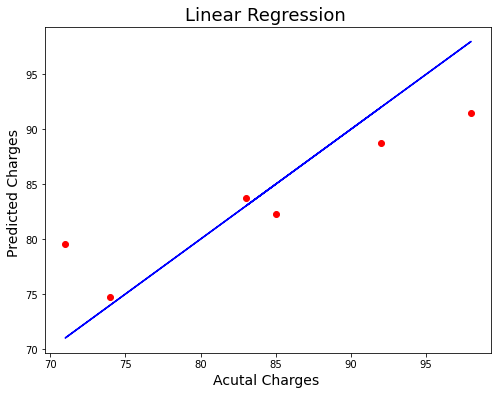

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=train_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Linear Regression ",fontsize=18)
plt.savefig('lr.png')
plt.show()

# We got  accuracy So we dont do the hyperparameter tuning.

In [91]:
parameter={'criterion':['mse','mae'],
          'max_features':['auto','sqrt','log2'],
          'max_depth':range(10,15),
          'min_samples_split':range(1,5),
          'min_samples_leaf':range(1,4)}



rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4}


In [92]:
rf=RandomForestRegressor(criterion='mae',max_features='log2',max_depth=12,min_samples_leaf=1,min_samples_split=4)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print("R2 Score",rfs*100)
rfs_score=cross_val_score(rf,x,y,cv=5)
rfc=rfs_score.mean()
print('Cross Val Score',rfc*100)

R2 Score 70.28083202511775
Cross Val Score -44.4768402432368


In [93]:
x.shape

(29, 16)

In [94]:
r2 = rf.score(x_train,y_train)

n = x.shape[0]
p = x.shape[1]

adjus_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjus_r2

0.7559931303214229

# Lets Save Our Model

In [95]:
import pickle
filename='Baseballcase.'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [96]:
loaded_model=pickle.load(open('Baseballcase','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

70.28083202511775


In [97]:
# batch  No - ds0522
# Data Trained